# 第三回：布局格式定方圆

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 一、子图

### 1. 使用 `plt.subplots` 绘制均匀状态下的子图

返回元素分别是画布和子图构成的列表，第一个数字为行，第二个为列

`figsize` 参数可以指定整个画布的大小

`sharex` 和 `sharey` 分别表示是否共享横轴和纵轴刻度

`tight_layout` 函数可以调整子图的相对大小使字符不会重叠

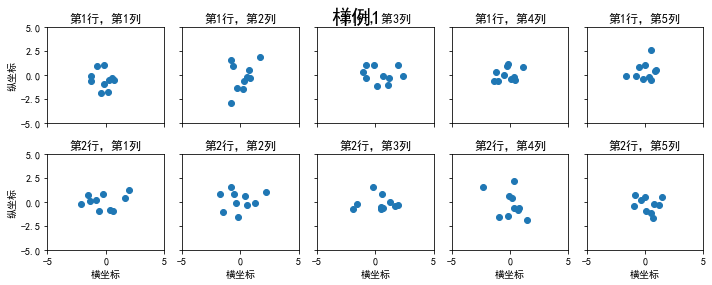

In [5]:
fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('样例1', size=20)
for i in range(2):
    for j in range(5):
        axs[i][j].scatter(np.random.randn(10), np.random.randn(10))
        axs[i][j].set_title('第%d行，第%d列'%(i+1,j+1))
        axs[i][j].set_xlim(-5,5)
        axs[i][j].set_ylim(-5,5)
        if i==1: axs[i][j].set_xlabel('横坐标')
        if j==0: axs[i][j].set_ylabel('纵坐标')
fig.tight_layout()

除了常规的直角坐标系，也可以通过`projection`方法创建极坐标系下的图表

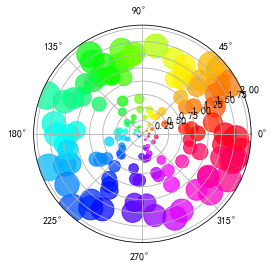

In [5]:
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta


plt.subplot(projection='polar')
plt.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

### 2. 使用 `GridSpec` 绘制非均匀子图

所谓非均匀包含两层含义，第一是指图的比例大小不同但没有跨行或跨列，第二是指图为跨列或跨行状态

利用 `add_gridspec` 可以指定相对宽度比例 `width_ratios` 和相对高度比例参数 `height_ratios`

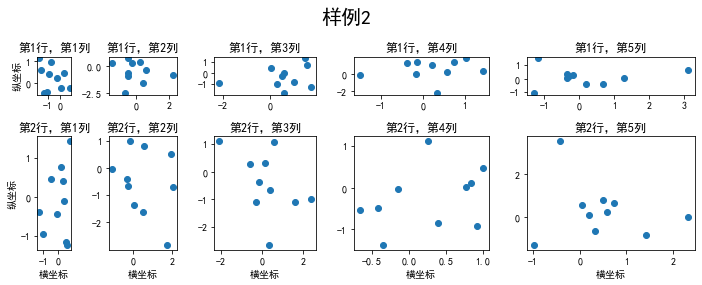

In [3]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=5, width_ratios=[1,2,3,4,5], height_ratios=[1,3])
fig.suptitle('样例2', size=20)
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(spec[i, j])
        ax.scatter(np.random.randn(10), np.random.randn(10))
        ax.set_title('第%d行，第%d列'%(i+1,j+1))
        if i==1: ax.set_xlabel('横坐标')
        if j==0: ax.set_ylabel('纵坐标')
fig.tight_layout()

在上面的例子中出现了 `spec[i, j]` 的用法，事实上通过切片就可以实现子图的合并而达到跨图的共能

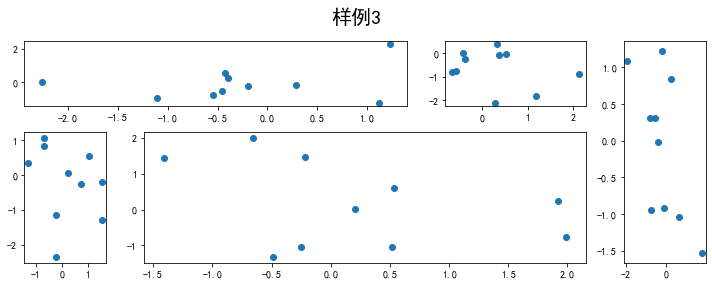

In [4]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=6, width_ratios=[2,2.5,3,1,1.5,2], height_ratios=[1,2])
fig.suptitle('样例3', size=20)
# sub1
ax = fig.add_subplot(spec[0, :3])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub2
ax = fig.add_subplot(spec[0, 3:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub3
ax = fig.add_subplot(spec[:, 5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub4
ax = fig.add_subplot(spec[1, 0])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub5
ax = fig.add_subplot(spec[1, 1:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
fig.tight_layout()

## 二、子图上的方法

在 `ax` 对象上定义了和 `plt` 类似的图形绘制函数，常用的有： `plot, hist, scatter, bar, barh, pie`

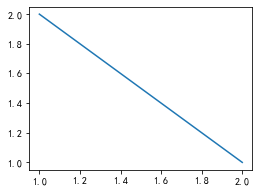

In [5]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot([1,2],[2,1])

hist函数的参数定义如下：
matplotlib.pyplot.hist( 
 x, bins=10, range=None, normed=False,  
 weights=None, cumulative=False, bottom=None,  
 histtype=u'bar', align=u'mid', orientation=u'vertical',  
 rwidth=None, log=False, color=None, label=None, stacked=False,  
 hold=None, **kwargs)
 该函数的意义是，对给定的数据x，进行统计，根据不同值的个数画出直方图。下面代码中，ax.hist(np.random.randn(1000))，输入数据是符合正态分布的1000个随机数。没有给出Bins，那么取默认值10， 即显示10个柱体。bins也可以通过边界指定，即输入一个数组，代码如下：

(array([ 28.,  55., 131., 173., 253., 201., 107.,  37.,  13.,   2.]),
 array([-2.67756292, -2.0632484 , -1.44893388, -0.83461937, -0.22030485,
         0.39400967,  1.00832419,  1.62263871,  2.23695323,  2.85126774,
         3.46558226]),
 <a list of 10 Patch objects>)

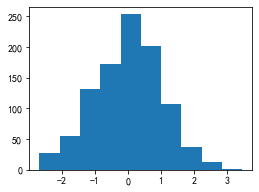

In [6]:
fig, ax = plt.subplots(figsize=(4,3))
ax.hist(np.random.randn(1000))

(array([ 11., 110., 355., 338., 154.,  16.]),
 array([-2.5, -2. , -1. ,  0. ,  1. ,  2. ,  2.5]),
 <a list of 6 Patch objects>)

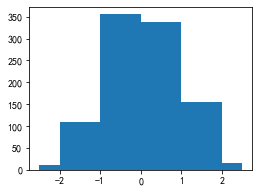

In [7]:
fig, ax = plt.subplots(figsize=(4,3))
ax.hist(np.random.randn(1000),bins=[-2.5,-2,-1,0,1,2,2.5])

常用直线的画法为： `axhline, axvline, axline` （水平、垂直、任意方向）
注：axhline(y，xmin,xmax)。代码中ax.axhline(0.5,0.2,0.8)，代表画一条水平线，y=0.5，x从0.2到0.8。axvline类似。axline的参数为线段的两个端点

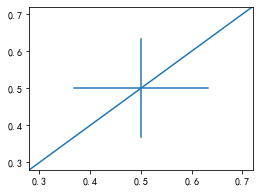

In [7]:
fig, ax = plt.subplots(figsize=(4,3))
ax.axhline(0.5,0.2,0.8)
ax.axvline(0.5,0.2,0.8)
ax.axline([0.3,0.3],[0.7,0.7])

使用 `grid` 可以加灰色网格

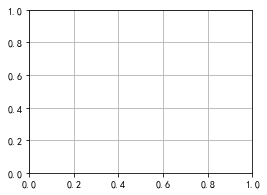

In [8]:
fig, ax = plt.subplots(figsize=(4,3))
ax.grid(True)

使用 `set_xscale, set_title, set_xlabel` 分别可以设置坐标轴的规度（指对数坐标等）、标题、轴名

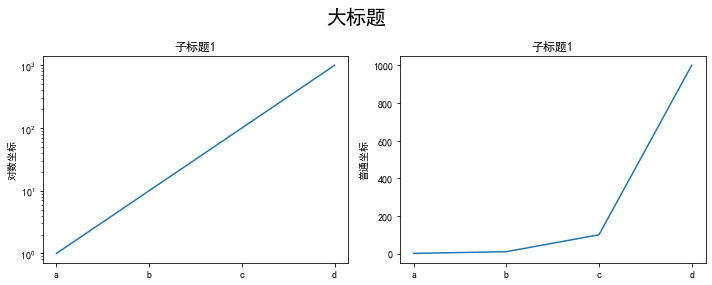

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('大标题', size=20)
for j in range(2):
    axs[j].plot(list('abcd'), [10**i for i in range(4)])
    if j==0:
        axs[j].set_yscale('log')
        axs[j].set_title('子标题1')
        axs[j].set_ylabel('对数坐标')
    else:
        axs[j].set_title('子标题1')
        axs[j].set_ylabel('普通坐标')
fig.tight_layout()

与一般的 `plt` 方法类似， `legend, annotate, arrow, text` 对象也可以进行相应的绘制

Text(0.8, 0.2, '这是中点')

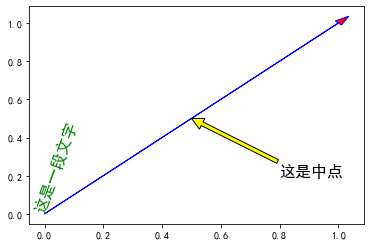

In [10]:
fig, ax = plt.subplots()
ax.arrow(0, 0, 1, 1, head_width=0.03, head_length=0.05, facecolor='red', edgecolor='blue')
ax.text(x=0, y=0,s='这是一段文字', fontsize=16, rotation=70, rotation_mode='anchor', color='green')
ax.annotate('这是中点', xy=(0.5, 0.5), xytext=(0.8, 0.2), arrowprops=dict(facecolor='yellow', edgecolor='black'), fontsize=16)

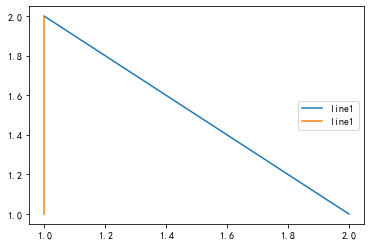

In [10]:
fig, ax = plt.subplots()
ax.plot([1,2],[2,1],label="line1")
ax.plot([1,1],[1,2],label="line1")
ax.legend(loc=7)

其中，图例的 `loc` 参数如下：

|  string   | code  |
|  ----  | ----  |
| best  | 0 |
| upper right  | 1 |
| upper left  | 2 |
| lower left  | 3 |
| lower right  | 4 |
| right  | 5 |
| center left  | 6 |
| center right  | 7 |
| lower center  | 8 |
| upper center  | 9 |
| center  | 10 |

## 作业

### 1. 墨尔本1981年至1990年的每月温度情况

In [3]:
ex1 = pd.read_csv('data/layout_ex1.csv')
ex1.head()

,Time,Temperature
0,1981-01,17.712903
1,1981-02,17.678571
2,1981-03,13.500000
3,1981-04,12.356667
4,1981-05,9.490323


- 请利用数据，画出如下的图：

<img src="https://s1.ax1x.com/2020/11/01/BwvCse.png" width="800" align="bottom" />

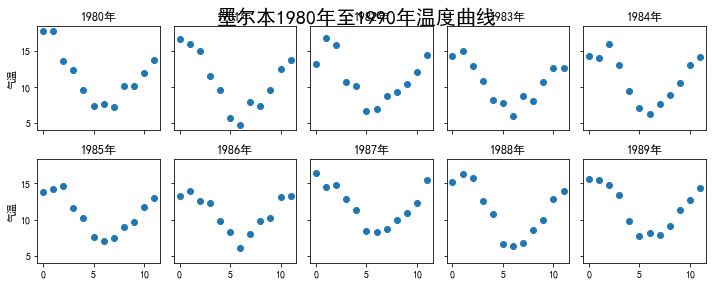

In [11]:
ex1 = pd.read_csv('./data/layout_ex1.csv')
ex1.head()

fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('墨尔本1980年至1990年温度曲线', size=20)
for i in range(2):
    for j in range(5):
        startloc=(i*5+j)*12
        month_data=ex1.iloc[startloc:startloc+12,[1]]
        arr_month=np.array(month_data)
        axs[i][j].scatter(range(12), arr_month)
        axs[i][j].set_title('%d年'%(1980+(i*5+j)))

        if j==0: axs[i][j].set_ylabel('气温')
fig.tight_layout()
plt.show()

### 2. 画出数据的散点图和边际分布

- 用 `np.random.randn(2, 150)` 生成一组二维数据，使用两种非均匀子图的分割方法，做出该数据对应的散点图和边际分布图

<img src="https://s1.ax1x.com/2020/11/01/B0pEnS.png" width="400" height="400" align="bottom" />